In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib nbagg

In [2]:
path = '../NionData/GPruns_070421/'
name = 'GPrun_200iter_0_prediction_UCB_2_0.npy'
file_list = glob.glob(path + name)
print(file_list)
# print(filelist)

['../NionData/GPruns_070421/GPrun_200iter_0_prediction_UCB_2_0.npy']


In [3]:
filename = file_list[0]
pred = np.load(filename)
abr = np.load(filename.replace('prediction','abr_coeff'))
ronch_array = np.load(filename.replace('prediction', 'ronchigram'))
best_seen = np.argmax(pred)

In [4]:
print(best_seen)
print(pred[best_seen])
print(ronch_array.shape)

81
[0.96212804]
(200, 128, 128)


<IPython.core.display.Javascript object>


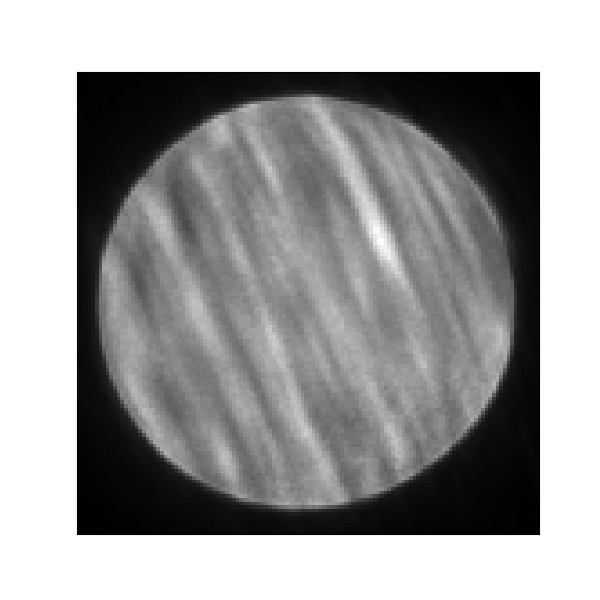

/home/chenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  after removing the cwd from sys.path.


[]

In [5]:
fig, ax = plt.subplots(1,1, figsize = [6, 6])
img = ax.imshow(ronch_array[0,:,:], extent = [-30,30,-30,30], cmap = 'gray')
ax.set_xticks([], [])
ax.set_yticks([], [])
# ax.set_xlabel(r'$\alpha_x$ (mrad)',fontsize = 16)
# ax.set_ylabel(r'$\alpha_y$ (mrad)', fontsize = 16)
# ax.tick_params(axis='x', labelsize=14)
# ax.tick_params(axis='y', labelsize=14)

In [8]:
abr_list = ["C10", "C12.x", "C12.y", "C21.x", "C21.y", "C23.x", "C23.y", "C30", 
"C32.x", "C32.y", "C34.x", "C34.y"]

abr_lim = [2e-7, 1.5e-7, 1.5e-7, 3e-6, 3e-6, 1e-5, 1e-5, 3e-4, 2e-4, 2e-4, 1.5e-4, 1.5e-4]

In [50]:
name = 'GPrun_200iter_5_prediction_UCB_2_0.npy'
abr_activate = [True, True, True, True, True, False, False, False, False, False, False, False]
abr_list_active = [abr_list[i] for i in np.arange(len(abr_list)) if abr_activate[i]]
print(abr_list_active)
file_list = glob.glob(path + name)
print(file_list)
filename = file_list[0]
pred = np.load(filename)
abr = np.load(filename.replace('prediction','abr_coeff'))
ronchigram = np.load(filename.replace('prediction', 'ronchigram'))
best_seen = np.argmax(pred)

['C10', 'C12.x', 'C12.y', 'C21.x', 'C21.y']
['../NionData/GPruns_070421/GPrun_200iter_5_prediction_UCB_2_0.npy']


<IPython.core.display.Javascript object>


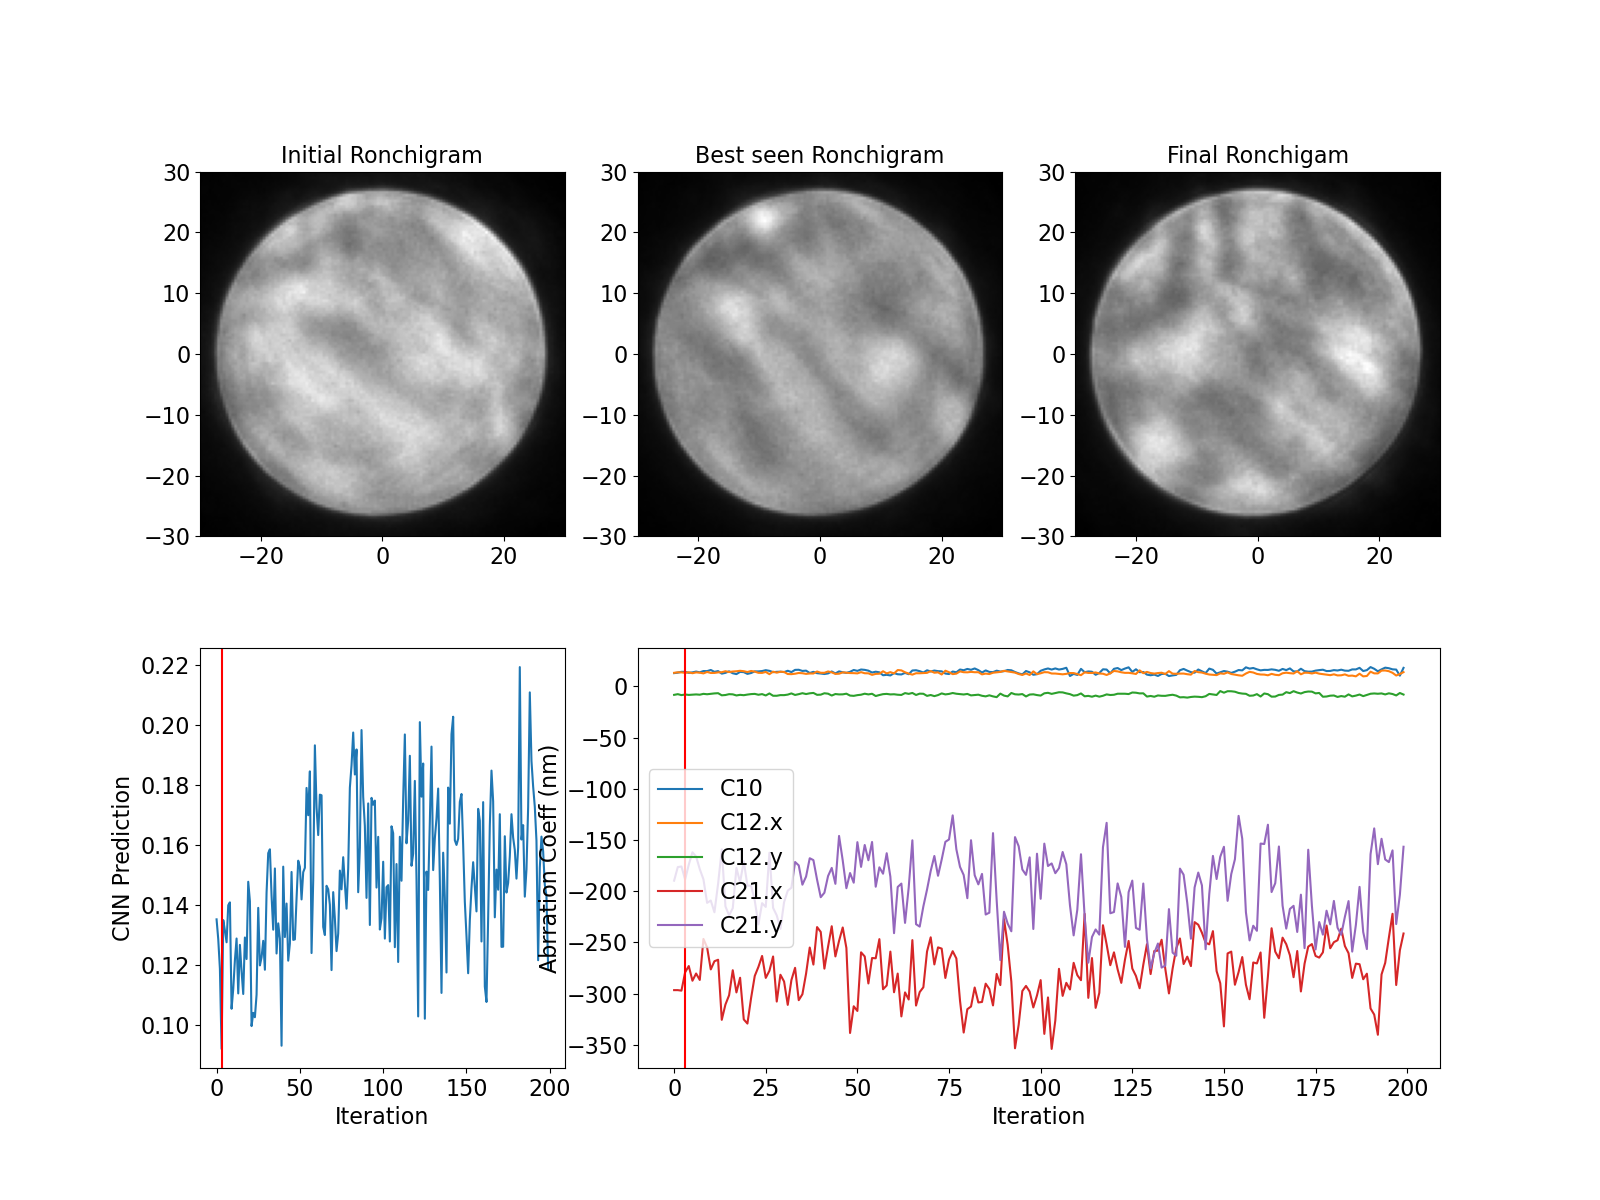

In [51]:
fig = plt.figure(constrained_layout = True, figsize = [16,12])
gs = plt.GridSpec(2, 3)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(ronchigram[0], extent = [-30,30,-30,30], cmap = 'gray')
ax1.tick_params(axis='both', labelsize=16)
ax1.set_title('Initial Ronchigram', fontsize = 16)

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(ronchigram[best_seen], extent = [-30,30,-30,30], cmap = 'gray')
ax2.tick_params(axis='both', labelsize=16)
ax2.set_title('Best seen Ronchigram', fontsize = 16)

ax3 = fig.add_subplot(gs[0,2])
ax3.imshow(ronchigram[-1], extent = [-30,30,-30,30], cmap = 'gray')
ax3.tick_params(axis='both', labelsize=16)
ax3.set_title('Final Ronchigam', fontsize = 16)

# plot for normalized emittance
ax4 = fig.add_subplot(gs[1,0])
ax4.plot(1-pred)
ax4.set_xlabel('Iteration',fontsize = 16)
ax4.set_ylabel('CNN Prediction', fontsize = 16)
ax4.tick_params(axis='both', labelsize=16)
ax4.axvline(best_seen, c='r')

# aberration coefficients:
ax5 = fig.add_subplot(gs[1,1:3])
for i in range(abr.shape[1]):
    p = ax5.plot((abr[:,i] * abr_lim[i] - abr_lim[i] / 2) * 1e9, label = abr_list_active[i])
ax5.legend(fontsize = 16)
ax5.set_xlabel('Iteration',fontsize = 16)
ax5.set_ylabel('Abrration Coeff (nm)', fontsize = 16)
ax5.tick_params(axis='both', labelsize=16)
ax5.axvline(best_seen, c='r', label = 'best seen')